Loaded 1833 points from normal flight: normal_corridor_base_data.csv
Loaded 2554 points from attack flight: attack_corridor_base_data.csv
Generating 2D Top-Down Flight Path Comparison plot...


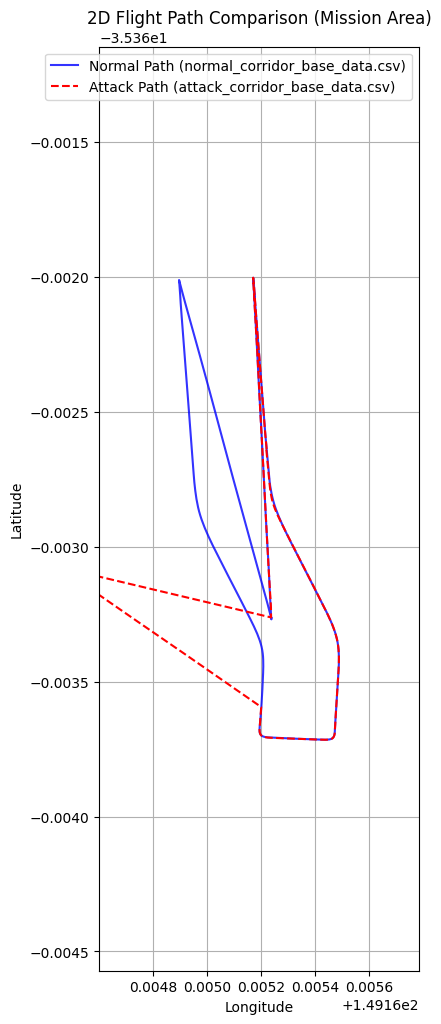

Generating Time-Series Telemetry Comparison plot...


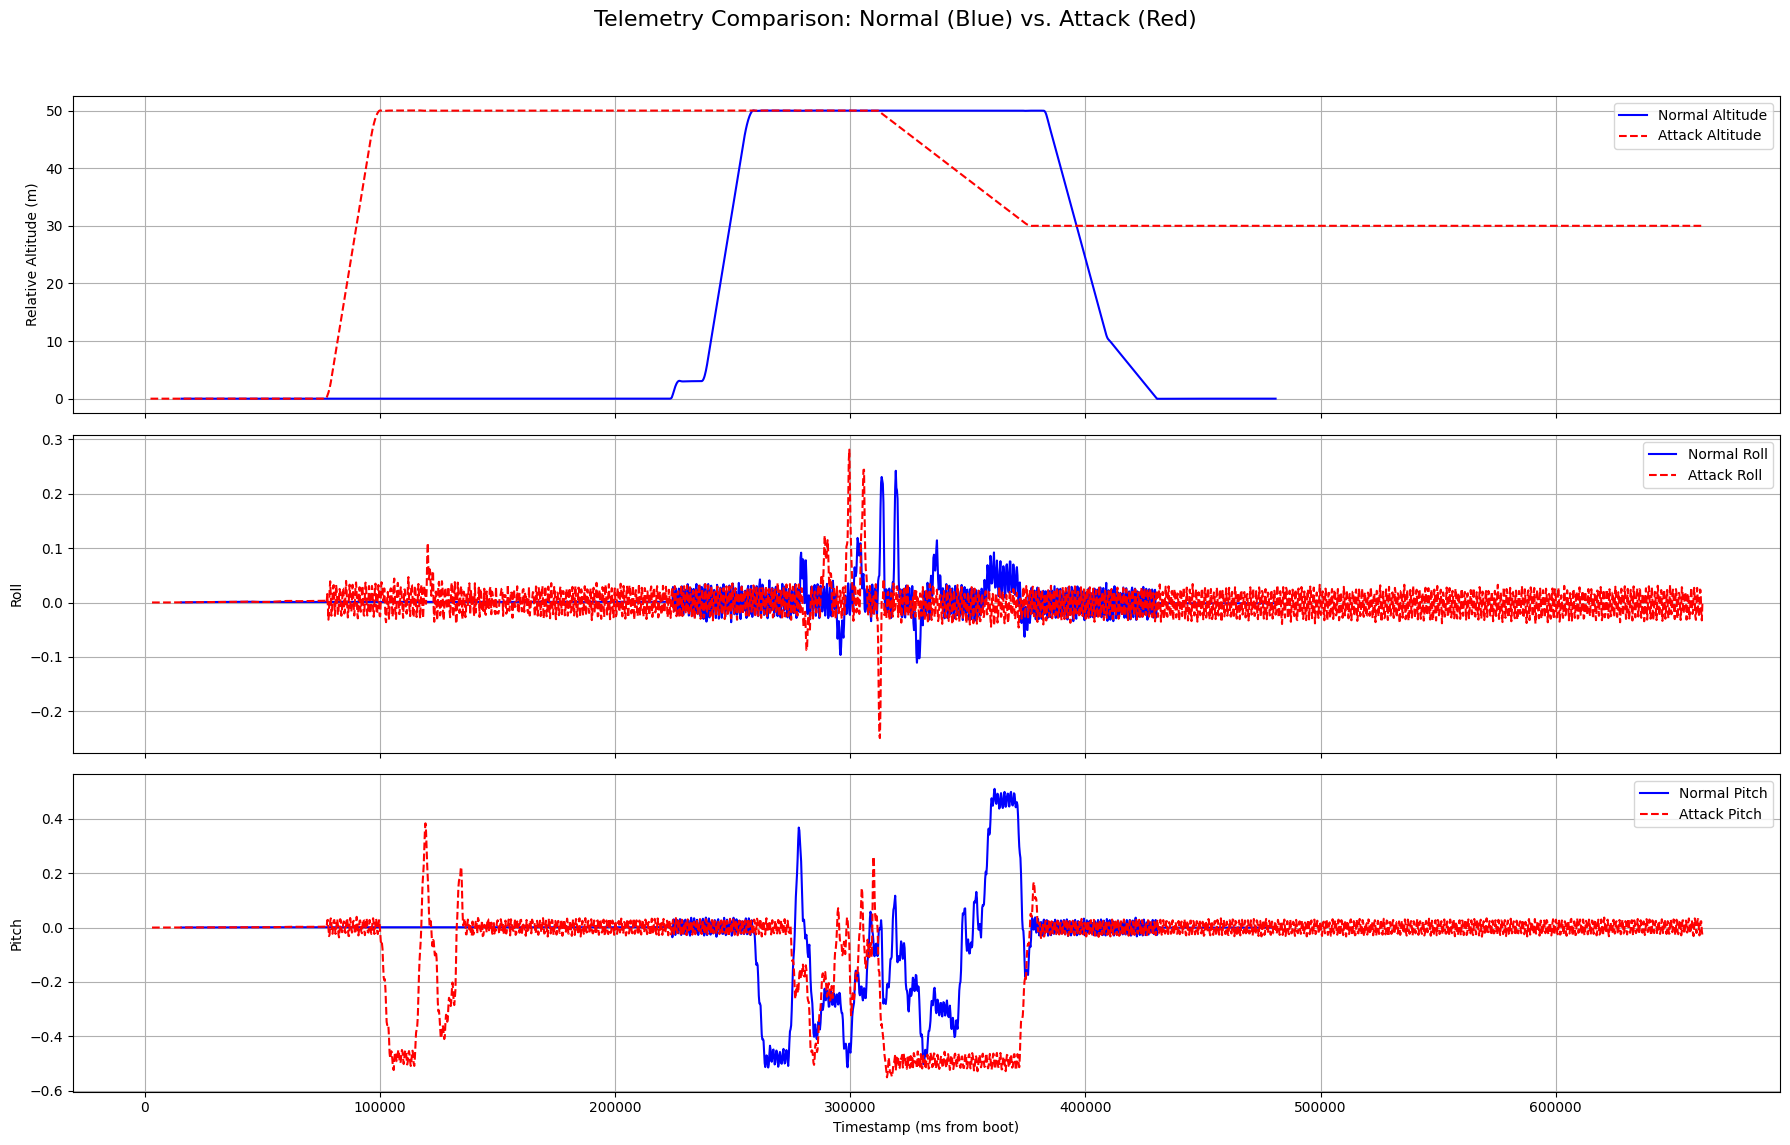

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import os

def visualize_comparison(normal_csv, attack_csv):
    """
    Loads two CSV files (normal and attack) and creates 2D and time-series 
    comparison visualizations.
    """
    # --- 1. Load Data ---
    try:
        df_normal = pd.read_csv(normal_csv)
        df_attack = pd.read_csv(attack_csv)
        print(f"Loaded {len(df_normal)} points from normal flight: {os.path.basename(normal_csv)}")
        print(f"Loaded {len(df_attack)} points from attack flight: {os.path.basename(attack_csv)}")
    except FileNotFoundError as e:
        print(f"Error: Could not find a file. {e}")
        return
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        return

    # --- 2. 2D Flight Path Comparison (Zoomed-In View) ---
    print("Generating 2D Top-Down Flight Path Comparison plot...")
    # Create a single figure for the zoomed-in plot
    fig_2d, ax_zoom = plt.subplots(figsize=(12, 12))
    
    # Plot the normal and attack paths
    ax_zoom.plot(df_normal['pos_lon'], df_normal['pos_lat'], label=f'Normal Path ({os.path.basename(normal_csv)})', color='blue', alpha=0.8)
    ax_zoom.plot(df_attack['pos_lon'], df_attack['pos_lat'], label=f'Attack Path ({os.path.basename(attack_csv)})', color='red', linestyle='--')
    ax_zoom.set_xlabel('Longitude')
    ax_zoom.set_ylabel('Latitude')
    ax_zoom.set_title('2D Flight Path Comparison (Mission Area)')
    ax_zoom.legend()
    ax_zoom.grid(True)
    
    # Set the plot limits to focus only on the normal mission area
    # This will show the corridor scan and the start of the attack
    # INCREASE THIS VALUE TO ZOOM OUT (e.g., from 0.15 to 0.5)
    x_margin = (df_normal['pos_lon'].max() - df_normal['pos_lon'].min()) * 0.5
    y_margin = (df_normal['pos_lat'].max() - df_normal['pos_lat'].min()) * 0.5
    ax_zoom.set_xlim(df_normal['pos_lon'].min() - x_margin, df_normal['pos_lon'].max() + x_margin)
    ax_zoom.set_ylim(df_normal['pos_lat'].min() - y_margin, df_normal['pos_lat'].max() + y_margin)
    ax_zoom.set_aspect('equal', adjustable='box')
    
    plt.show()

    # --- 3. Time-Series Telemetry Comparison ---
    print("Generating Time-Series Telemetry Comparison plot...")
    fig_ts, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12), sharex=True)
    fig_ts.suptitle('Telemetry Comparison: Normal (Blue) vs. Attack (Red)', fontsize=16)

    ax1.plot(df_normal['timestamp'], df_normal['pos_alt_rel'], color='blue', label='Normal Altitude')
    ax1.plot(df_attack['timestamp'], df_attack['pos_alt_rel'], color='red', linestyle='--', label='Attack Altitude')
    ax1.set_ylabel('Relative Altitude (m)')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(df_normal['timestamp'], df_normal['att_roll'], color='blue', label='Normal Roll')
    ax2.plot(df_attack['timestamp'], df_attack['att_roll'], color='red', linestyle='--', label='Attack Roll')
    ax2.set_ylabel('Roll')
    ax2.legend()
    ax2.grid(True)

    ax3.plot(df_normal['timestamp'], df_normal['att_pitch'], color='blue', label='Normal Pitch')
    ax3.plot(df_attack['timestamp'], df_attack['att_pitch'], color='red', linestyle='--', label='Attack Pitch')
    ax3.set_ylabel('Pitch')
    ax3.set_xlabel('Timestamp (ms from boot)')
    ax3.legend()
    ax3.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == '__main__':
    normal_csv = 'normal_corridor_base_data.csv'
    attack_csv = 'attack_corridor_base_data.csv'

    visualize_comparison(normal_csv, attack_csv)



Loaded 1347 points from normal flight: normal_corridor_base_10_data.csv
Loaded 973 points from attack flight: attack_corridor_base_5_data.csv
Filtered normal path data: 639 points
Filtered attack path data: 551 points
Generating 2D Top-Down Flight Path Comparison plot...


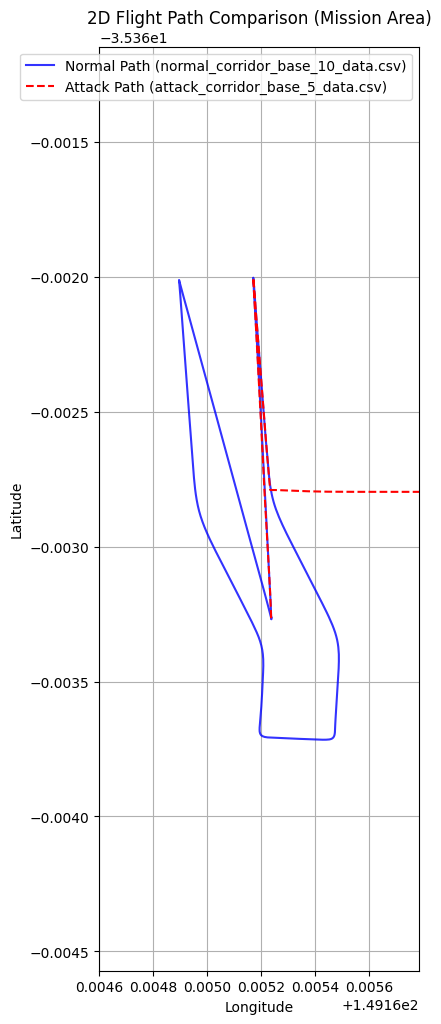

Generating Time-Series Telemetry Comparison plot...


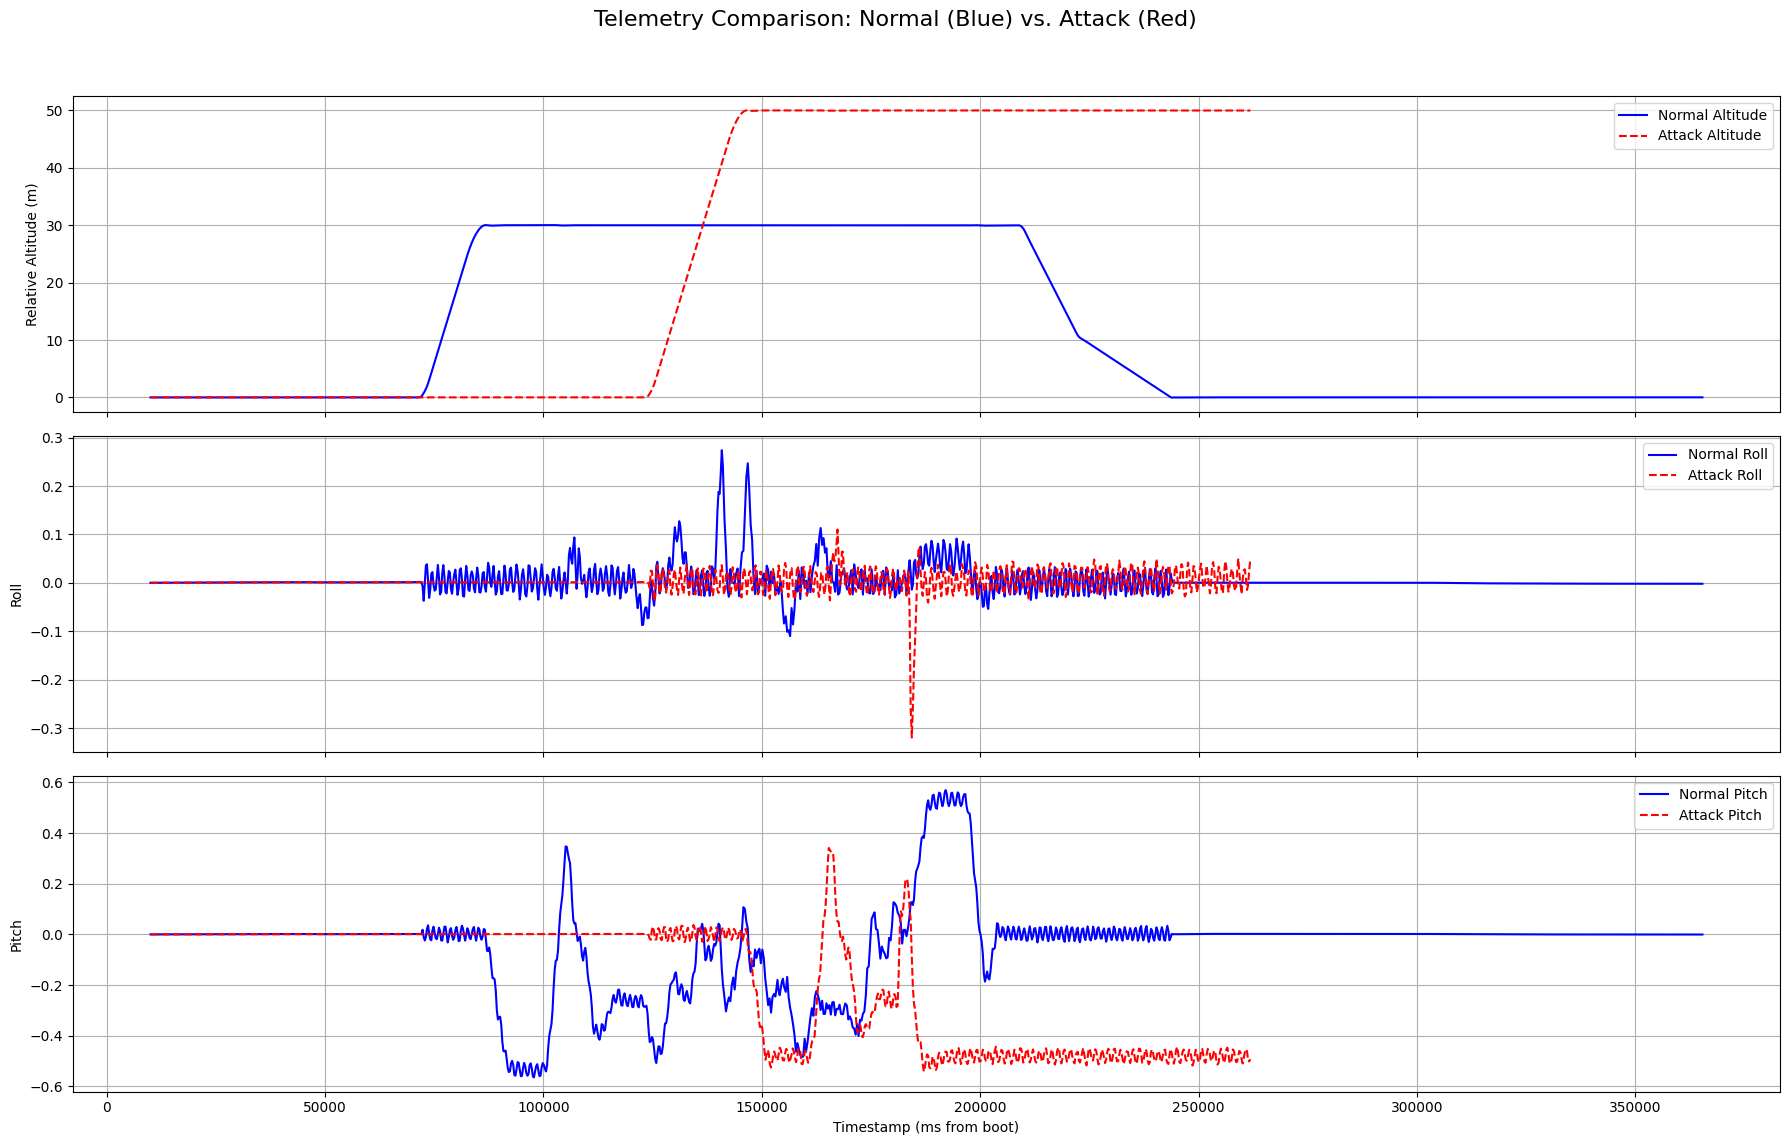

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import os

def visualize_comparison(normal_csv, attack_csv):
    """
    Loads two CSV files (normal and attack) and creates 2D and time-series 
    comparison visualizations.
    Filters out pre-flight data for path plots.
    """
    # --- 1. Load Data ---
    try:
        df_normal = pd.read_csv(normal_csv)
        df_attack = pd.read_csv(attack_csv)
        print(f"Loaded {len(df_normal)} points from normal flight: {os.path.basename(normal_csv)}")
        print(f"Loaded {len(df_attack)} points from attack flight: {os.path.basename(attack_csv)}")
    except FileNotFoundError as e:
        print(f"Error: Could not find a file. {e}")
        return
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        return

    # --- 2. Filter Data for Path Plotting ---
    # This is the FIX: We only plot data where the drone is airborne.
    # This removes all "on-the-ground" data (where lat/lon might be 0,0).
    df_normal_path = df_normal[df_normal['pos_alt_rel'] > 0.5]
    df_attack_path = df_attack[df_attack['pos_alt_rel'] > 0.5]

    if df_normal_path.empty:
        print("Warning: No 'normal' flight data found above 0.5m altitude. Cannot plot 2D path.")
        return
        
    print(f"Filtered normal path data: {len(df_normal_path)} points")
    print(f"Filtered attack path data: {len(df_attack_path)} points")

    # --- 3. 2D Flight Path Comparison (Zoomed-In View) ---
    print("Generating 2D Top-Down Flight Path Comparison plot...")
    fig_2d, ax_zoom = plt.subplots(figsize=(12, 12))
    
    # Plot the FILTERED normal and attack paths
    ax_zoom.plot(df_normal_path['pos_lon'], df_normal_path['pos_lat'], label=f'Normal Path ({os.path.basename(normal_csv)})', color='blue', alpha=0.8)
    if not df_attack_path.empty:
        ax_zoom.plot(df_attack_path['pos_lon'], df_attack_path['pos_lat'], label=f'Attack Path ({os.path.basename(attack_csv)})', color='red', linestyle='--')
    
    ax_zoom.set_xlabel('Longitude')
    ax_zoom.set_ylabel('Latitude')
    ax_zoom.set_title('2D Flight Path Comparison (Mission Area)')
    ax_zoom.legend()
    ax_zoom.grid(True)
    
    # Set the plot limits to focus only on the normal mission area
    x_margin = (df_normal_path['pos_lon'].max() - df_normal_path['pos_lon'].min()) * 0.5
    y_margin = (df_normal_path['pos_lat'].max() - df_normal_path['pos_lat'].min()) * 0.5
    ax_zoom.set_xlim(df_normal_path['pos_lon'].min() - x_margin, df_normal_path['pos_lon'].max() + x_margin)
    ax_zoom.set_ylim(df_normal_path['pos_lat'].min() - y_margin, df_normal_path['pos_lat'].max() + y_margin)
    ax_zoom.set_aspect('equal', adjustable='box')
    
    plt.show()

    # --- 4. Time-Series Telemetry Comparison ---
    print("Generating Time-Series Telemetry Comparison plot...")
    # NOTE: We use the ORIGINAL (unfiltered) data for time-series,
    # because seeing the pre-flight "flat line" is useful.
    fig_ts, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12), sharex=True)
    fig_ts.suptitle('Telemetry Comparison: Normal (Blue) vs. Attack (Red)', fontsize=16)

    ax1.plot(df_normal['timestamp'], df_normal['pos_alt_rel'], color='blue', label='Normal Altitude')
    ax1.plot(df_attack['timestamp'], df_attack['pos_alt_rel'], color='red', linestyle='--', label='Attack Altitude')
    ax1.set_ylabel('Relative Altitude (m)')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(df_normal['timestamp'], df_normal['att_roll'], color='blue', label='Normal Roll')
    ax2.plot(df_attack['timestamp'], df_attack['att_roll'], color='red', linestyle='--', label='Attack Roll')
    ax2.set_ylabel('Roll')
    ax2.legend()
    ax2.grid(True)

    ax3.plot(df_normal['timestamp'], df_normal['att_pitch'], color='blue', label='Normal Pitch')
    ax3.plot(df_attack['timestamp'], df_attack['att_pitch'], color='red', linestyle='--', label='Attack Pitch')
    ax3.set_ylabel('Pitch')
    ax3.set_xlabel('Timestamp (ms from boot)')
    ax3.legend()
    ax3.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == '__main__':
    normal_csv = '/home/sarthak/drone_project/parsed_data/normal_corridor_base_10_data.csv'
    attack_csv = '/home/sarthak/drone_project/parsed_data/attack_corridor_base_5_data.csv'

    visualize_comparison(normal_csv, attack_csv)


In [1]:
import pandas as pd
import glob

files = sorted(glob.glob("parsed_data/normal_corridor_base_*_data.csv"))  # adjust path if needed

print(f"Found {len(files)} files\n")

for f in files:
    df = pd.read_csv(f, usecols=["pos_alt_rel"])
    mean_alt = df["pos_alt_rel"].mean()
    min_alt = df["pos_alt_rel"].min()
    max_alt = df["pos_alt_rel"].max()
    print(f"{f}: mean={mean_alt:.2f} m, range=({min_alt:.2f}–{max_alt:.2f}) m")


Found 15 files

parsed_data/normal_corridor_base_10_data.csv: mean=11.83 m, range=(-0.04–30.02) m
parsed_data/normal_corridor_base_11_data.csv: mean=37.91 m, range=(-0.03–70.02) m
parsed_data/normal_corridor_base_12_data.csv: mean=31.48 m, range=(-0.04–70.03) m
parsed_data/normal_corridor_base_13_data.csv: mean=35.21 m, range=(-0.03–70.02) m
parsed_data/normal_corridor_base_14_data.csv: mean=36.06 m, range=(-0.03–70.02) m
parsed_data/normal_corridor_base_15_data.csv: mean=30.03 m, range=(-0.01–70.02) m
parsed_data/normal_corridor_base_1_data.csv: mean=16.91 m, range=(-0.04–50.03) m
parsed_data/normal_corridor_base_2_data.csv: mean=9.36 m, range=(-0.04–50.01) m
parsed_data/normal_corridor_base_3_data.csv: mean=17.15 m, range=(-0.04–50.02) m
parsed_data/normal_corridor_base_4_data.csv: mean=17.02 m, range=(-0.04–50.02) m
parsed_data/normal_corridor_base_5_data.csv: mean=13.90 m, range=(-0.04–50.02) m
parsed_data/normal_corridor_base_6_data.csv: mean=15.63 m, range=(-0.03–30.02) m
parsed_

In [1]:
import pandas as pd
import glob
import numpy as np

files = sorted(glob.glob("parsed_data/normal_corridor_base_*_data.csv"))

print(f"Found {len(files)} CSV files\n")

def estimate_speed(df):
    if "vel" in df.columns:
        # If you already have ground speed
        return df["vel"].mean()
    elif {"pos_lat", "pos_lon", "timestamp"}.issubset(df.columns):
        # Compute speed from position change
        lat = np.deg2rad(df["pos_lat"].values)
        lon = np.deg2rad(df["pos_lon"].values)
        t = df["timestamp"].values

        # Compute distance (meters) between consecutive points using haversine formula
        R = 6371000  # Earth radius in m
        dlat = np.diff(lat)
        dlon = np.diff(lon)
        a = np.sin(dlat / 2) ** 2 + np.cos(lat[:-1]) * np.cos(lat[1:]) * np.sin(dlon / 2) ** 2
        dist = 2 * R * np.arcsin(np.sqrt(a))

        dt = np.diff(t)
        dt[dt == 0] = np.nan  # avoid divide-by-zero
        speed = dist / dt

        # Filter out noise
        speed = speed[(speed > 0.5) & (speed < 50)]
        return np.mean(speed) if len(speed) else np.nan
    else:
        return np.nan

for f in files:
    try:
        df = pd.read_csv(f)
        v = estimate_speed(df)
        print(f"{f}: ~{v:.2f} m/s")
    except Exception as e:
        print(f"{f}: ERROR -> {e}")


Found 15 CSV files

parsed_data/normal_corridor_base_10_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_11_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_12_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_13_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_14_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_15_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_1_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_2_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_3_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_4_data.csv: ERROR -> cannot convert float NaN to integer
parsed_data/normal_corridor_base_5_data.csv: ERROR -> cannot convert float

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os



try:
    df = pd.read_csv('/home/sarthak/drone_project/parsed_data/attack_corridor_base_6_data.csv')
except FileNotFoundError:
    print(f"Error: File not found.")
    print(f"Please make sure your file '{CSV_FILE_NAME}' is inside the 'parsed_data' folder.")
    exit()

# Check if necessary columns exist
if 'pos_alt_rel' not in df.columns or 'timestamp' not in df.columns:
    print("Error: The CSV file is missing 'pos_alt_rel' or 'timestamp' columns.")
    exit()

# --- Statistics ---
base_altitude = df['pos_alt_rel'].iloc[10] # Get altitude near the start
min_altitude = df['pos_alt_rel'].min()
min_alt_time = df.loc[df['pos_alt_rel'].idxmin()]['timestamp']
max_altitude = df['pos_alt_rel'].max()

print("\n--- Flight Analysis ---")
print(f"  Base Altitude (approx): {base_altitude:.2f} m")
print(f"  Max Altitude Reached:   {max_altitude:.2f} m")
print(f"  Min Altitude Reached:   {min_altitude:.2f} m (at {min_alt_time} ms)")
print(f"  Altitude 'Dip' Size:    {(base_altitude - min_altitude):.2f} m")

if base_altitude - min_altitude > 5: # 5m threshold for a "dip"
    print("\n[SUCCESS] A significant altitude dip was detected.")
else:
    print("\n[WARNING] No significant altitude dip was detected.")


# --- Plotting ---
print(f"\nGenerating plot... saved as '{OUTPUT_IMAGE_NAME}'")
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['pos_alt_rel'], label='Relative Altitude (pos_alt_rel)')

# Highlight the minimum altitude point
plt.plot(min_alt_time, min_altitude, 'ro', markersize=10, label=f'Attack Min Alt ({min_altitude:.2f}m)')

plt.title(f'Altitude Spoof Analysis: {CSV_FILE_NAME}', fontsize=16)
plt.xlabel('Timestamp (milliseconds)', fontsize=12)
plt.ylabel('Relative Altitude (m)', fontsize=12)
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(OUTPUT_IMAGE_NAME)

print("\nAnalysis complete. Check the saved image.")


--- Flight Analysis ---
  Base Altitude (approx): 0.00 m
  Max Altitude Reached:   50.03 m
  Min Altitude Reached:   -0.03 m (at 308082 ms)
  Altitude 'Dip' Size:    0.03 m

[WARNING] No significant altitude dip was detected.


NameError: name 'OUTPUT_IMAGE_NAME' is not defined

Attempting to load: parsed_data/attack_corridor_base_7_data.csv

--- Flight Analysis ---
  Base Yaw (approx): -4.64 degrees
  Max Yaw Reached:   178.28 degrees
  Min Yaw Reached:   -178.95 degrees
  Attack Yaw Detected: -177.71 degrees (at 166854 ms)
  Total Yaw Change:    173.08 degrees

[SUCCESS] A significant yaw change was detected.

Generating plot... saved as 'yaw_spoof_analysis.png'

Analysis complete. Check the saved image.


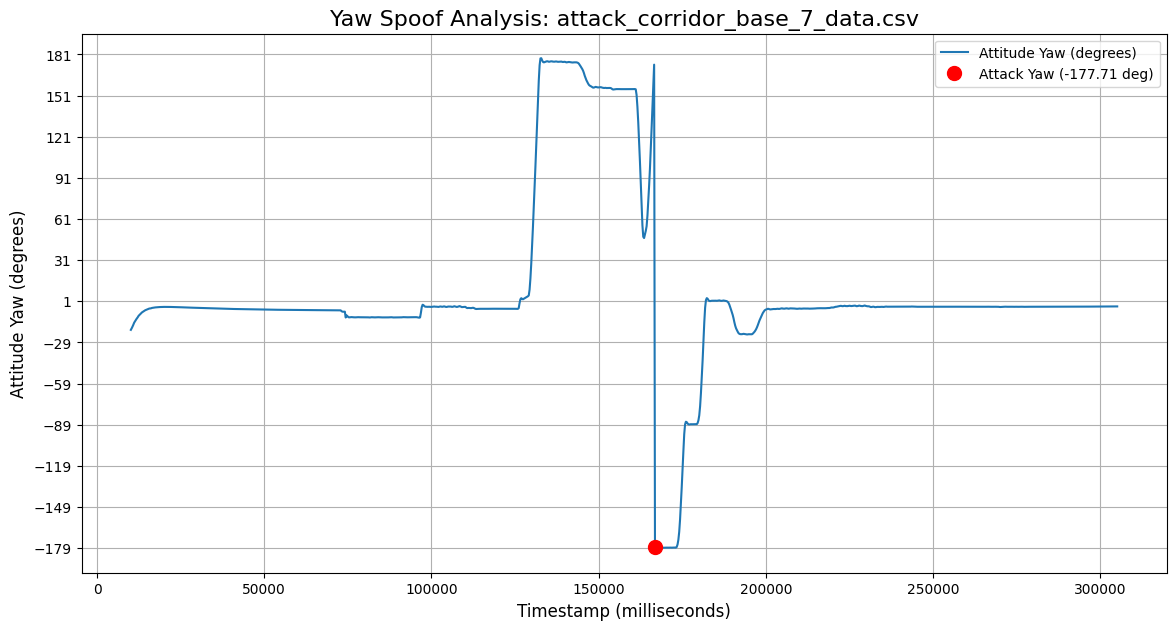

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np # Import numpy for degree conversion

# --- Configuration ---
# 1. UPDATE THIS to the name of your yaw spoof CSV
CSV_FILE_NAME = 'attack_corridor_base_7_data.csv' # <-- CHANGE THIS
# ---------------------

# Construct the full path
CSV_FILE_PATH = os.path.join('parsed_data', CSV_FILE_NAME)
OUTPUT_IMAGE_NAME = 'yaw_spoof_analysis.png'

# --- Main Analysis ---
print(f"Attempting to load: {CSV_FILE_PATH}")

try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: File not found.")
    print(f"Please make sure your file '{CSV_FILE_NAME}' is inside the 'parsed_data' folder.")
    exit()

# Check if necessary columns exist
if 'att_yaw' not in df.columns or 'timestamp' not in df.columns:
    print("Error: The CSV file is missing 'att_yaw' or 'timestamp' columns.")
    exit()

# --- CONVERT YAW TO DEGREES ---
# att_yaw is in radians, convert to degrees for analysis
df['att_yaw_deg'] = np.degrees(df['att_yaw'])

# --- Statistics ---
# Get yaw near the start (e.g., at row 100 to avoid init noise)
base_yaw = df['att_yaw_deg'].iloc[100] 
min_yaw = df['att_yaw_deg'].min()
max_yaw = df['att_yaw_deg'].max()

# Find the point of maximum change
# This is more robust for yaw, which can be positive or negative
max_change_point = df['att_yaw_deg'].diff().abs().idxmax()
attack_yaw = df['att_yaw_deg'].loc[max_change_point]
attack_time = df['timestamp'].loc[max_change_point]

yaw_change = abs(attack_yaw - base_yaw)

print("\n--- Flight Analysis ---")
print(f"  Base Yaw (approx): {base_yaw:.2f} degrees")
print(f"  Max Yaw Reached:   {max_yaw:.2f} degrees")
print(f"  Min Yaw Reached:   {min_yaw:.2f} degrees")
print(f"  Attack Yaw Detected: {attack_yaw:.2f} degrees (at {attack_time} ms)")
print(f"  Total Yaw Change:    {yaw_change:.2f} degrees")

if yaw_change > 45: # A 45-degree jump is significant
    print("\n[SUCCESS] A significant yaw change was detected.")
else:
    print("\n[WARNING] No significant yaw change was detected.")


# --- Plotting ---
print(f"\nGenerating plot... saved as '{OUTPUT_IMAGE_NAME}'")
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['att_yaw_deg'], label='Attitude Yaw (degrees)')

# Highlight the attack point
plt.plot(attack_time, attack_yaw, 'ro', markersize=10, label=f'Attack Yaw ({attack_yaw:.2f} deg)')

plt.title(f'Yaw Spoof Analysis: {CSV_FILE_NAME}', fontsize=16)
plt.xlabel('Timestamp (milliseconds)', fontsize=12)
plt.ylabel('Attitude Yaw (degrees)', fontsize=12)
plt.legend()
plt.grid(True)
plt.yticks(np.arange(min(min_yaw, 0), max(max_yaw, 90) + 30, 30)) # Set y-axis ticks

# Save the plot
plt.savefig(OUTPUT_IMAGE_NAME)

print("\nAnalysis complete. Check the saved image.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np # Import numpy for degree conversion

# --- Configuration ---
# 1. UPDATE THIS to the name of your yaw spoof CSV
CSV_FILE_NAME = 'attack_corridor_base_10_data.csv' # <-- CHANGE THIS
# ---------------------

# Construct the full path
CSV_FILE_PATH = os.path.join('parsed_data', CSV_FILE_NAME)
OUTPUT_IMAGE_NAME = 'yaw_spoof_analysis.png'

# --- Main Analysis ---
print(f"Attempting to load: {CSV_FILE_PATH}")

try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: File not found.")
    print(f"Please make sure your file '{CSV_FILE_NAME}' is inside the 'parsed_data' folder.")
    exit()

df['flight_id']

Attempting to load: parsed_data/attack_corridor_base_8_data.csv


0       attack_corridor_base_9
1       attack_corridor_base_9
2       attack_corridor_base_9
3       attack_corridor_base_9
4       attack_corridor_base_9
                 ...          
1273    attack_corridor_base_9
1274    attack_corridor_base_9
1275    attack_corridor_base_9
1276    attack_corridor_base_9
1277    attack_corridor_base_9
Name: flight_id, Length: 1278, dtype: object

In [15]:
# After loading the CSV
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: File not found.")
    print(f"Please make sure your file '{CSV_FILE_NAME}' is inside the 'parsed_data' folder.")
    exit()

# --- Fix the incorrect flight_id ---
correct_id = 'attack_corridor_base_8'  # Extracted from filename
df['flight_id'] = correct_id  # Overwrite all values with correct ID
print(f"✅ Updated flight_id to '{correct_id}' for all {len(df)} entries.")


✅ Updated flight_id to 'attack_corridor_base_8' for all 1278 entries.


In [17]:
df['flight_id']

0       attack_corridor_base_8
1       attack_corridor_base_8
2       attack_corridor_base_8
3       attack_corridor_base_8
4       attack_corridor_base_8
                 ...          
1273    attack_corridor_base_8
1274    attack_corridor_base_8
1275    attack_corridor_base_8
1276    attack_corridor_base_8
1277    attack_corridor_base_8
Name: flight_id, Length: 1278, dtype: object

In [18]:
output_path = os.path.join('parsed_data', f'{correct_id}_fixed.csv')
df.to_csv(output_path, index=False)
print(f"💾 Saved corrected CSV to: {output_path}")


💾 Saved corrected CSV to: parsed_data/attack_corridor_base_8_fixed.csv


Loading: parsed_data/attack_corridor_base_10_data.csv

--- ALTITUDE SUMMARY ---
count    1148.000000
mean       32.089686
std        22.036457
min        -0.032000
25%         3.492000
50%        49.967000
75%        49.993000
max        50.017000
Name: pos_alt_rel, dtype: float64

Target altitude: 30.0 m ±2.0 m
Mean altitude: 32.09 m
Min altitude: -0.03 m, Max altitude: 50.02 m
Standard deviation: 22.04 m
Percentage of time within ±2.0 m: 1.48%
❌ Plane did NOT maintain 30 m — major altitude drift detected.

Saved plot -> altitude_stability_check.png


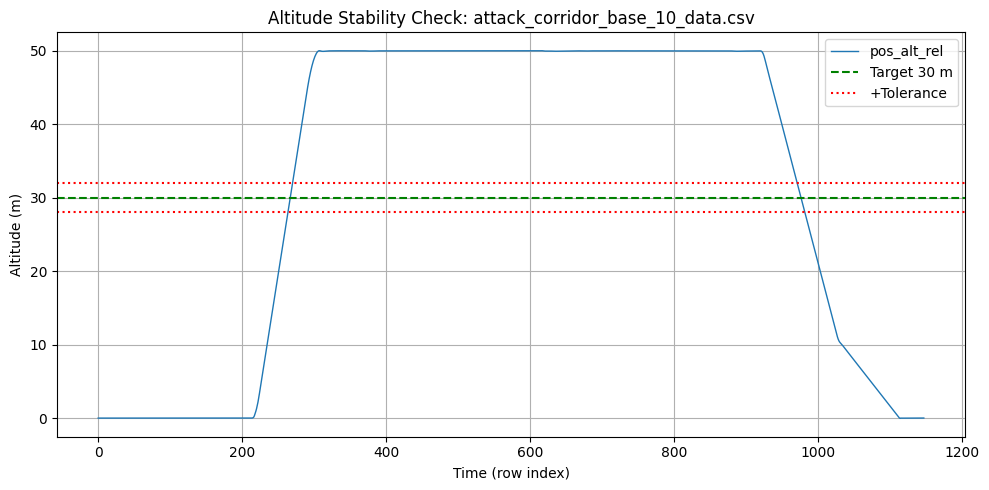

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# --- Config ---
CSV_FILE_NAME = 'attack_corridor_base_10_data.csv'
CSV_PATH = os.path.join('parsed_data', CSV_FILE_NAME)
TARGET_ALT = 30.0  # target altitude in meters
TOLERANCE = 2.0    # allowable ± deviation from target (in meters)

# --- Load ---
print(f"Loading: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)

if 'pos_alt_rel' not in df.columns:
    raise KeyError("Column 'pos_alt_rel' not found in CSV — cannot check altitude.")

alt = df['pos_alt_rel'].astype(float)

# --- Basic summary ---
print("\n--- ALTITUDE SUMMARY ---")
print(alt.describe())

# --- Stability Check ---
within_band = alt.between(TARGET_ALT - TOLERANCE, TARGET_ALT + TOLERANCE)
percentage_within = within_band.mean() * 100

min_alt = alt.min()
max_alt = alt.max()
mean_alt = alt.mean()
std_alt = alt.std()

print(f"\nTarget altitude: {TARGET_ALT} m ±{TOLERANCE} m")
print(f"Mean altitude: {mean_alt:.2f} m")
print(f"Min altitude: {min_alt:.2f} m, Max altitude: {max_alt:.2f} m")
print(f"Standard deviation: {std_alt:.2f} m")
print(f"Percentage of time within ±{TOLERANCE} m: {percentage_within:.2f}%")

if percentage_within > 95:
    print("✅ Plane held altitude steadily near 30 m.")
elif percentage_within > 70:
    print("⚠️ Plane stayed near 30 m most of the time, but with noticeable deviations.")
else:
    print("❌ Plane did NOT maintain 30 m — major altitude drift detected.")

# --- Optional Plot ---
plt.figure(figsize=(10,5))
plt.plot(alt, label='pos_alt_rel', linewidth=1)
plt.axhline(TARGET_ALT, color='g', linestyle='--', label='Target 30 m')
plt.axhline(TARGET_ALT + TOLERANCE, color='r', linestyle=':', label='+Tolerance')
plt.axhline(TARGET_ALT - TOLERANCE, color='r', linestyle=':')
plt.title(f"Altitude Stability Check: {CSV_FILE_NAME}")
plt.xlabel("Time (row index)")
plt.ylabel("Altitude (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("altitude_stability_check.png", dpi=200)
print("\nSaved plot -> altitude_stability_check.png")
